Question 1: "Streamings(Age_ratings) v Quantity of age rating + review avg rating + " (Bar graphs) 

[Comparing Streaming services to the quanitity of reviews + the review average]


In [1]:
import tmdbsimple as tmdb
import requests
import pandas as pd
from config import tmdb_apikey
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt


In [2]:
api_key = tmdb_apikey
movie_title = "Dangle"
url = "https://api.themoviedb.org/3/movie/"
#https://api.themoviedb.org/3/movie/550?api_key=92d0ac13bb95fcebf93b027ef79c481a
#https://api.themoviedb.org/3/search/movie?api_key=###&query=the+avengers
queryURL = f"https://api.themoviedb.org/3/search/movie?api_key={api_key}&query={movie_title}"
title_response = requests.get(queryURL).json()
#title_response

In [3]:
#https://api.themoviedb.org/3/discover/movie?api_key=###&language=en-US&with_genres=28
genre_ID = 27
genreURL = f"https://api.themoviedb.org/3/discover/movie?api_key={api_key}&language=en-US&with_genres={genre_ID}"
genre_response = requests.get(genreURL).json()
#response

In [4]:
# Import csv and drop all null values

moviesDF = pd.read_csv("../Data/KaggleWithTMDBData.csv")


kaggle_tmdbDF = moviesDF.drop(columns=['Unnamed: 0', 'Type'])
#len(kaggle_tmdbDF)
#2694 rows
kaggle_tmdbDF.tail(2)

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,TMDB ID,Correct ID,Vote Average,Vote Count,Genre,Movie Budget,Movie Revenue,Original Language
2692,9509,What the Shark?,2020,13+,14/100,0,0,0,1,811282,811282.0,0.0,0.0,Documentary,0.0,0.0,en
2693,9515,Women of Impact: Changing the World,2019,7+,10/100,0,0,0,1,669441,669441.0,9.5,1.0,Documentary,0.0,0.0,en


In [5]:
# Count how many movies are in each Streaming Service categories

netflixMovies = kaggle_tmdbDF.loc[(kaggle_tmdbDF['Netflix'] == 1) & (kaggle_tmdbDF['Hulu'] == 0) &
                                (kaggle_tmdbDF['Prime Video'] == 0) & (kaggle_tmdbDF['Disney+'] == 0)]
netflixCount = len(netflixMovies)


huluMovies = kaggle_tmdbDF.loc[(kaggle_tmdbDF['Netflix'] == 0) & (kaggle_tmdbDF['Hulu'] == 1) &
                                (kaggle_tmdbDF['Prime Video'] == 0) & (kaggle_tmdbDF['Disney+'] == 0)]
huluCount = len(huluMovies)


primeMovies = kaggle_tmdbDF.loc[(kaggle_tmdbDF['Netflix'] == 0) & (kaggle_tmdbDF['Hulu'] == 0) &
                                (kaggle_tmdbDF['Prime Video'] == 1) & (kaggle_tmdbDF['Disney+'] == 0)]
primeCount = len(primeMovies) 


disneyMovies = kaggle_tmdbDF.loc[(kaggle_tmdbDF['Netflix'] == 0) & (kaggle_tmdbDF['Hulu'] == 0) &
                                (kaggle_tmdbDF['Prime Video'] == 0) & (kaggle_tmdbDF['Disney+'] == 1)]
disneyCount = len(disneyMovies) 

multiserviceCount = len(kaggle_tmdbDF) - np.sum(netflixCount + huluCount + primeCount + disneyCount)

multiserviceCount


74

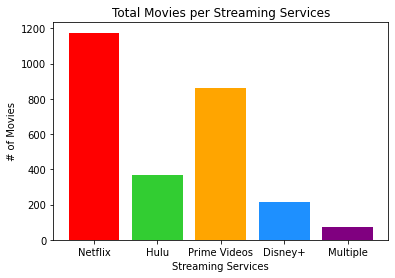

In [6]:
# Plot count of movies per streaming service

services = ['Netflix', 'Hulu', 'Prime Videos', 'Disney+', 'Multiple']
services_movieCounts = [netflixCount, huluCount, primeCount, disneyCount, multiserviceCount]
services_Xaxis = np.arange(len(services))

plt.bar(services_Xaxis, services_movieCounts, color= ['Red', 'limegreen', 'orange', 'dodgerblue', 'purple'])
services_ticklocations = [value for value in services_Xaxis]
plt.xticks(services_ticklocations, services)

plt.title("Total Movies per Streaming Services")
plt.xlabel("Streaming Services")
plt.ylabel("# of Movies")
plt.savefig("data/movies_per_service.png")

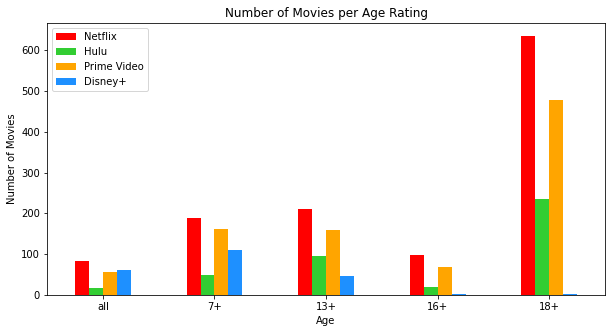

In [7]:
# Sort and plot data for Age Ratings
age_rating = kaggle_tmdbDF.groupby('Age', as_index= False).sum()
new_index = [4, 3, 0, 1, 2]
letter_ratings = ['G (all)', 'PG (7+)', 'PG-13 (13+)', 'R (16+)', 'X (18+)']

age_ratingDF = age_rating.drop(columns= ['ID',  'TMDB ID', 'Correct ID', 'Vote Average', 'Vote Count', 'Movie Budget', 
                                        'Movie Revenue', 'Year']).reindex(new_index)


age_ratingDF.plot(kind= 'bar', x= 'Age', color= ['Red', 'limegreen', 'orange', 'dodgerblue'], figsize= (10, 5), rot= 0)

plt.ylabel("Number of Movies")
plt.title("Number of Movies per Age Rating")
plt.savefig("data/age_per_services.png")

In [8]:
# Rotten Tomatoes Rating
kaggle_tmdbDF.tail(50)

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,TMDB ID,Correct ID,Vote Average,Vote Count,Genre,Movie Budget,Movie Revenue,Original Language
2644,9224,Let's Be Tigers,2021,7+,51/100,0,0,0,1,818367,818367.0,6.900,10.0,Drama,0.0,0.0,en
2645,9236,Iron Man & Hulk: Heroes United,2013,7+,51/100,0,0,0,1,230896,230896.0,5.800,152.0,Action,0.0,0.0,en
2646,9245,Marvel Studios: Expanding the Universe,2019,7+,50/100,0,0,0,1,647375,647375.0,5.684,19.0,Documentary,0.0,0.0,en
2647,9247,Super Buddies,2013,all,50/100,0,0,0,1,149910,149910.0,6.100,112.0,Family,0.0,0.0,en
2648,9253,Into the Okavango,2018,7+,50/100,0,0,0,1,520446,520446.0,7.200,21.0,Documentary,0.0,0.0,en
2649,9272,Gender Revolution: A Journey with Katie Couric,2017,7+,49/100,0,0,0,1,438962,438962.0,6.500,14.0,Documentary,0.0,0.0,en
2650,9277,High School Musical: The Musical: The Series: ...,2019,all,49/100,0,0,0,1,658938,658938.0,8.600,19.0,Documentary,0.0,0.0,en
2651,9296,Lost on Everest,2020,13+,48/100,0,0,0,1,704854,704854.0,8.100,37.0,Documentary,0.0,0.0,en
2652,9297,Breaking2,2017,7+,48/100,0,0,0,1,456231,456231.0,8.100,6.0,Documentary,0.0,0.0,en
2653,9302,Dolphin Reef,2018,all,48/100,0,0,0,1,454291,454291.0,6.800,68.0,Documentary,0.0,0.0,en


In [9]:
# Clean and prep dataset to calculate Number Ratings
# Clean, clean, clean!!

num_ratingDF = kaggle_tmdbDF.drop(columns= ['ID', 'Year', 'Age', 'TMDB ID', 'Correct ID', 'Vote Average', 'Vote Count', 
                                           'Genre', 'Movie Budget', 'Movie Revenue', 'Original Language'])

RT_splitDF = num_ratingDF['Rotten Tomatoes'].str.split('/', n= 1, expand= True)
merge_numDF = pd.concat([num_ratingDF, RT_splitDF], axis= 1, join= 'inner')
num_ratingNEW = merge_numDF.drop(columns= ['Rotten Tomatoes', 1])
num_ratingNEW.rename(columns= {0 : "Rotten Tomatoes"}, inplace = True)

# num_ratingNEW.head(2)

# Categorize into 1 -5 stars with conditions:
# 1 star = 0 - 20
# 2 star = 21 - 40
# 3 star = 41 - 60
# 4 star = 61 - 80
# 5 star = 81 - 100

num_ratingNEW.head(2)
num_ratingNEW['Rotten Tomatoes'] = pd.to_numeric(num_ratingNEW['Rotten Tomatoes'])

star1 = num_ratingNEW.loc[num_ratingNEW['Rotten Tomatoes'] <= 20]
star2 = num_ratingNEW.loc[(num_ratingNEW['Rotten Tomatoes'] > 20) & (num_ratingNEW['Rotten Tomatoes'] <= 40)]
star3 = num_ratingNEW.loc[(num_ratingNEW['Rotten Tomatoes'] > 40) & (num_ratingNEW['Rotten Tomatoes'] <= 60)]
star4 = num_ratingNEW.loc[(num_ratingNEW['Rotten Tomatoes'] > 60) & (num_ratingNEW['Rotten Tomatoes'] <= 80)]
star5 = num_ratingNEW.loc[(num_ratingNEW['Rotten Tomatoes'] > 80) & (num_ratingNEW['Rotten Tomatoes'] <= 100)]
star1.head(2)

,Title,Netflix,Hulu,Prime Video,Disney+,Rotten Tomatoes
1212,The Upshaws - The Afterparty,1,0,0,0,20
1213,Chhota Bheem Ka Roosi Romanch,1,0,0,0,12


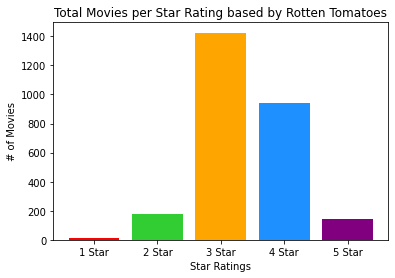

In [10]:
# Plot count of movies per star rating

star_category = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
starCounts = [len(star1), len(star2), len(star3), len(star4), len(star5)]
star_Xaxis = np.arange(len(star_category))

plt.bar(star_Xaxis, starCounts, color= ['Red', 'limegreen', 'orange', 'dodgerblue', 'purple'])
star_ticklocations = [value for value in star_Xaxis]
plt.xticks(star_ticklocations, star_category)

plt.title("Total Movies per Star Rating based by Rotten Tomatoes")
plt.xlabel("Star Ratings")
plt.ylabel("# of Movies")

plt.savefig("data/movies_per_star.png")

In [11]:
# Create new DF and calculate the number of movies for each star rating and each streaming service

# New clean DF
merge_numDF = pd.concat([num_ratingDF, RT_splitDF], axis= 1, join= 'inner')
starDF = merge_numDF.drop(columns= ['Rotten Tomatoes', 1])
starDF.rename(columns= {0 : "Rotten Tomatoes"}, inplace = True)
starDF['Rotten Tomatoes'] = pd.to_numeric(starDF['Rotten Tomatoes'])
starDF.head(2)

,Title,Netflix,Hulu,Prime Video,Disney+,Rotten Tomatoes
0,The Irishman,1,0,0,0,98
1,David Attenborough: A Life on Our Planet,1,0,0,0,95


In [12]:
# df['column name'] = df['column name'].replace(['1st old value','2nd old value',...],'new value')
starDF['Star Rating'] = starDF['Rotten Tomatoes']
# starDF['Star Rating'] = starDF['Star Rating'].replace([(starDF['Star Rating'] <= 20), 
#                                                        (starDF['Star Rating'] <= 40), 
#                                                        (starDF['Star Rating'] <= 60), 
#                                                        (starDF['Star Rating'] <= 80), 
#                                                        (starDF['Star Rating'] <= 100)],
#                                                       1, 2, 3, 4, 5)

starDF.loc[starDF['Star Rating'] <= 20, ['Star Rating']] = 1
starDF.loc[(starDF['Star Rating'] > 20) & (starDF['Star Rating'] <= 40), ['Star Rating']] = 2
starDF.loc[(starDF['Star Rating'] > 40) & (starDF['Star Rating'] <= 60), ['Star Rating']] = 3
starDF.loc[(starDF['Star Rating'] > 60) & (starDF['Star Rating'] <= 80), ['Star Rating']] = 4
starDF.loc[(starDF['Star Rating'] > 80) & (starDF['Star Rating'] <= 100), ['Star Rating']] = 5

                                                      
# df.loc[ df[“column_name”] == “some_value”, “column_name”] = “value”                                                      
                                                      
                                                      
# starDF['Star Rating'] = starDF['Star Rating'].replace([(starDF['Star Rating'] <= 20), 
#                                                        (starDF['Star Rating'] > 20) & (starDF['Star Rating'] <= 40),
#                                                        (starDF['Star Rating'] > 40) & (starDF['Star Rating'] <= 60),
#                                                        (starDF['Star Rating'] > 60) & (starDF['Star Rating'] <= 80),
#                                                        (starDF['Star Rating'] > 80) & (starDF['Star Rating'] <= 100)
#                                                       ], 1, 2, 3, 4, 5)


# df['column name'] = df['column name'].replace(['old value'],'new value')

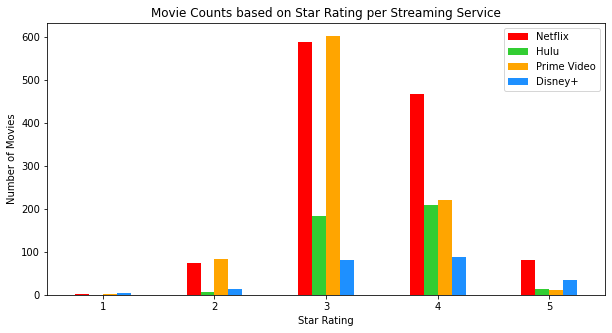

In [23]:
# Sort and plot data for Age Ratings

star_rating = starDF.drop(columns= ['Rotten Tomatoes'])
star_rating = starDF.groupby('Star Rating', as_index= False).sum()
starBar = star_rating.drop(columns= ['Rotten Tomatoes'])
# new_index = [4, 3, 0, 1, 2]
# letter_ratings = ['G (all)', 'PG (7+)', 'PG-13 (13+)', 'R (16+)', 'X (18+)']

# age_ratingDF = age_rating.drop(columns= ['ID',  'TMDB ID', 'Correct ID', 'Vote Average', 'Vote Count', 'Movie Budget', 
#                                         'Movie Revenue', 'Year']).reindex(new_index)


starBar.plot(kind= 'bar', x= 'Star Rating', color= ['Red', 'limegreen', 'orange', 'dodgerblue'], figsize= (10, 5), rot= 0)


plt.ylabel("Number of Movies")
plt.title("Movie Counts based on Star Rating per Streaming Service")
plt.savefig("data/star_moviecount.png")

In [ ]:
starDF.tail()

In [ ]:
# Count how many movies are in each Star rating categories

# star1 = num_ratingNEW.loc[num_ratingNEW['Rotten Tomatoes'] <= 20]
# star2 = num_ratingNEW.loc[(num_ratingNEW['Rotten Tomatoes'] > 20) & (num_ratingNEW['Rotten Tomatoes'] <= 40)]
# star3 = num_ratingNEW.loc[(num_ratingNEW['Rotten Tomatoes'] > 40) & (num_ratingNEW['Rotten Tomatoes'] <= 60)]
# star4 = num_ratingNEW.loc[(num_ratingNEW['Rotten Tomatoes'] > 60) & (num_ratingNEW['Rotten Tomatoes'] <= 80)]
# star5 = num_ratingNEW.loc[(num_ratingNEW['Rotten Tomatoes'] > 80) & (num_ratingNEW['Rotten Tomatoes'] <= 100)]

# # Netflix Stars
# netStar1 = []
# netStar2 = []
# netStar3 = []
# netStar4 = []
# netStar5 = []

# for column in star1:
#     #print(star1[column].sum())
    

# for column in df.columns[1:]:

# star1Count = star1.groupby('Netflix', as_index= False).sum()
# len(star1Count)

In [ ]:
# ** Testing Cell **


# Use .groupby() to group the Age ratings and create a new DF and 
#all = G
#7+ = PG
#13+ = PG-13
#16+ = R
#18+ = x

# ratingG = moviesDF[(moviesDF['Age'] == 'all')]
#ratingPG = moviesDF[(moviesDF['Age'] == '7+')]
#ratingPG_13 = moviesDF[(moviesDF['Age'] == '13+')]
#ratingR = moviesDF[(moviesDF['Age'] == '16+')]
#ratingX = moviesDF[(moviesDF['Age'] == '18+')]

# age_ratingResults = moviesDF['Age'].value_counts()
# x = moviesDF.groupby(['Age']).count()['Title']

# movie_ageRatingDF = pd.DataFrame({ 
#    "G Rating" : age_ratingResults[0], 
#   "PG Rating" : age_ratingResults[1], 
#   "PG_13 Rating" : age_ratingResults[2], 
#   "R Rating" : age_ratingResults[3], 
#   "X Rating" : age_ratingResults[4] 
# })

#movie_ageRatingDF.head(2)


# age_ratingResults
#ratingG
# x